This data will be collected by the US Department of Energy in order to develop 
the infrastructure of the stockpile and to address some of the negative phenomena that occur in the use of the reservoir,
such as abandoning the reservoir
This report was prepared to observe this phenomenon, find out its causes and what is related to it, 
and write proposals 

<img src="tank1.jpg">

## details for every tank and its area , city in USA
Area Name                        
Area Address                 
Area City                       
Site Zip                        
Tank Num                         
Closure Type                     
Compartment                     
carrying tank capacity(gallons)  
Substance Currently Stored      
Status of Tank                  
Construction Type - Tank         
Construction Type - Piping       
Installation Date                
Tank Latitude                    
Tank Longitude                   
Area Latitude                   
Area Longitude                  
Overfill Protection             
Spill Protection                 
Tank protection                 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math
from geopy.distance import great_circle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc = {'figure.figsize' :[15,5]}, font_scale = 1.3)

In [2]:
from datasist.structdata import  detect_outliers

In [3]:
df = pd.read_csv('Tanks_USA.csv')
df.drop(['Unnamed: 0'],axis =1 , inplace =True)

In [4]:
df.duplicated().sum()

10

In [5]:
df

,Area Name,Area Address,Area City,Site Zip,Tank Num,Closure Type,Compartment,carrying tank capacity(gallons),Substance Currently Stored,Status of Tank,Construction Type - Tank,Construction Type - Piping,Installation Date,Tank Latitude,Tank Longitude,Area Latitude,Area Longitude,Overfill Protection,Spill Protection,Tank protection
0,Brewer Dauntless Marina,9 NOVELTY LN,ESSEX,6426.0,1,Permanently Closed,b,4000,Gasoline,Tank is runing underground,Coated & Cathodically Protected Steel (sti-P3),Flexible Plastic,1999-06-01,41.350018,-72.385442,41.350018,-72.385442,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket,"Cathodically Protected,Double Walled,Interior ..."
1,FOOD BAG #509,1652 BOSTON POST RD,OLD SAYBROOK,6475.0,D1,Permanently Closed,a,10000,Diesel,Tank is runing underground,Coated & Cathodically Protected Steel (sti-P3),Rigid Fiberglass Reinforced Plastic,1983-02-01,41.286115,-72.414762,41.286115,-72.414762,"Ball Float Device,Flapper Device",Spill Bucket,"Double Walled,Excavation Liner"
2,510 FARMINGTON AVE,510 FARMINGTON AVE,BRISTOL,6010.0,D4,Permanently Closed,a,1000,Used Oil,Tank is runing underground,Coated & Cathodically Protected Steel (sti-P3),Galvanized Steel,1953-01-01,41.689698,-72.926238,41.689710,-72.926260,Audible Alarm,Spill Bucket & spout,Cathodically Protected
3,WILTON WORK CENTER (Northeast Utilities),ROUTE 7,Wilton,6141.0,A1,Permanently Closed,a,2000,Gasoline,Tank is runing underground,Asphalt Coated or Bare Steel,Other (Specify),1956-01-01,41.791461,-72.661565,41.791460,-72.661570,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket & spout,"Cathodically Protected,Double Walled,Interior ..."
4,NEW ENGLAND MASONRY COMPANY,146 SHERIDAN DR,NAUGATUCK,6770.0,B2,Permanently Closed,a,2000,Gasoline,Tank is runing underground,Asphalt Coated or Bare Steel,Galvanized Steel,1980-02-01,41.508699,-73.042658,41.508699,-73.042658,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket,"Cathodically Protected,Double Walled,Interior ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49051,401 PUTNAM INC.,401 W PUTNAM AVE,GREENWICH,6830.0,B3,Permanently Closed,a,8000,Gasoline,Tank is runing underground,Asphalt Coated or Bare Steel,Galvanized Steel,1963-12-01,41.021822,-73.640032,41.021822,-73.640032,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket & spout,"Cathodically Protected,Double Walled,Interior ..."
49052,FIRST FUEL OF NORTH HAVEN,133 MIDDLETOWN AVE,NORTH HAVEN,6473.0,2R1,Temporarily Closed,b,4000,Diesel,Tank was Abandoned in Ground,Fiberglass Reinforced Plastic,Rigid Fiberglass Reinforced Plastic,2004-08-04,41.341382,-72.861577,41.341382,-72.861577,Flapper Device,spout,Double Walled
49053,GENERAL EQUITIES INC.,56 SOUTH MAIN STREET/ 327 SOUTH MAIN STREET,COLCHESTER,6415.0,H-1,Temporarily Closed,NaN,6000,Kerosene,Tank was Abandoned in Ground,Fiberglass Reinforced Plastic,Flexible Plastic,2001-05-01,41.568232,-72.327200,41.568232,-72.327200,"Ball Float Device,Flapper Device",Spill Bucket & spout,"Double Walled,Interior Lined with Epoxy Coating"
49054,BERKSHIRE PETROLEUM OF NORTH HAVEN,11 UNIVERSAL DR,NORTH HAVEN,6473.0,C1,Temporarily Closed,NaN,20000,Diesel,Tank was Abandoned in Ground,Coated & Cathodically Protected Steel (sti-P3),Rigid Fiberglass Reinforced Plastic,2004-04-01,41.350177,-72.868200,41.350177,-72.868200,Flapper Device,spout,Double Walled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49056 entries, 0 to 49055
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area Name                        49056 non-null  object 
 1   Area Address                     49044 non-null  object 
 2   Area City                        49056 non-null  object 
 3   Site Zip                         48939 non-null  float64
 4   Tank Num                         49055 non-null  object 
 5   Closure Type                     49056 non-null  object 
 6   Compartment                      48069 non-null  object 
 7   carrying tank capacity(gallons)  49056 non-null  int64  
 8   Substance Currently Stored       47226 non-null  object 
 9   Status of Tank                   49056 non-null  object 
 10  Construction Type - Tank         47281 non-null  object 
 11  Construction Type - Piping       49056 non-null  object 
 12  Installation Date 

In [6]:
df.isna().sum()

Area Name                             0
Area Address                         12
Area City                             0
Site Zip                            117
Tank Num                              1
Closure Type                          0
Compartment                         987
carrying tank capacity(gallons)       0
Substance Currently Stored         1830
Status of Tank                        0
Construction Type - Tank           1775
Construction Type - Piping            0
Installation Date                  1500
Tank Latitude                       510
Tank Longitude                      510
Area Latitude                       495
Area Longitude                      495
Overfill Protection                   0
Spill Protection                      0
Tank protection                       0
dtype: int64

# Preprocessing

In [6]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(include='number')

In [7]:
cat

,Area Name,Area Address,Area City,Tank Num,Closure Type,Compartment,Substance Currently Stored,Status of Tank,Construction Type - Tank,Construction Type - Piping,Installation Date,Overfill Protection,Spill Protection,Tank protection
0,Brewer Dauntless Marina,9 NOVELTY LN,ESSEX,1,Permanently Closed,b,Gasoline,Tank is runing underground,Coated & Cathodically Protected Steel (sti-P3),Flexible Plastic,1999-06-01,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket,"Cathodically Protected,Double Walled,Interior ..."
1,FOOD BAG #509,1652 BOSTON POST RD,OLD SAYBROOK,D1,Permanently Closed,a,Diesel,Tank is runing underground,Coated & Cathodically Protected Steel (sti-P3),Rigid Fiberglass Reinforced Plastic,1983-02-01,"Ball Float Device,Flapper Device",Spill Bucket,"Double Walled,Excavation Liner"
2,510 FARMINGTON AVE,510 FARMINGTON AVE,BRISTOL,D4,Permanently Closed,a,Used Oil,Tank is runing underground,Coated & Cathodically Protected Steel (sti-P3),Galvanized Steel,1953-01-01,Audible Alarm,Spill Bucket & spout,Cathodically Protected
3,WILTON WORK CENTER (Northeast Utilities),ROUTE 7,Wilton,A1,Permanently Closed,a,Gasoline,Tank is runing underground,Asphalt Coated or Bare Steel,Other (Specify),1956-01-01,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket & spout,"Cathodically Protected,Double Walled,Interior ..."
4,NEW ENGLAND MASONRY COMPANY,146 SHERIDAN DR,NAUGATUCK,B2,Permanently Closed,a,Gasoline,Tank is runing underground,Asphalt Coated or Bare Steel,Galvanized Steel,1980-02-01,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket,"Cathodically Protected,Double Walled,Interior ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49051,401 PUTNAM INC.,401 W PUTNAM AVE,GREENWICH,B3,Permanently Closed,a,Gasoline,Tank is runing underground,Asphalt Coated or Bare Steel,Galvanized Steel,1963-12-01,"Audible Alarm,Ball Float Device,Flapper Device",Spill Bucket & spout,"Cathodically Protected,Double Walled,Interior ..."
49052,FIRST FUEL OF NORTH HAVEN,133 MIDDLETOWN AVE,NORTH HAVEN,2R1,Temporarily Closed,b,Diesel,Tank was Abandoned in Ground,Fiberglass Reinforced Plastic,Rigid Fiberglass Reinforced Plastic,2004-08-04,Flapper Device,spout,Double Walled
49053,GENERAL EQUITIES INC.,56 SOUTH MAIN STREET/ 327 SOUTH MAIN STREET,COLCHESTER,H-1,Temporarily Closed,NaN,Kerosene,Tank was Abandoned in Ground,Fiberglass Reinforced Plastic,Flexible Plastic,2001-05-01,"Ball Float Device,Flapper Device",Spill Bucket & spout,"Double Walled,Interior Lined with Epoxy Coating"
49054,BERKSHIRE PETROLEUM OF NORTH HAVEN,11 UNIVERSAL DR,NORTH HAVEN,C1,Temporarily Closed,NaN,Diesel,Tank was Abandoned in Ground,Coated & Cathodically Protected Steel (sti-P3),Rigid Fiberglass Reinforced Plastic,2004-04-01,Flapper Device,spout,Double Walled


In [8]:
num

,Site Zip,carrying tank capacity(gallons),Tank Latitude,Tank Longitude,Area Latitude,Area Longitude
0,6426.0,4000,41.350018,-72.385442,41.350018,-72.385442
1,6475.0,10000,41.286115,-72.414762,41.286115,-72.414762
2,6010.0,1000,41.689698,-72.926238,41.689710,-72.926260
3,6141.0,2000,41.791461,-72.661565,41.791460,-72.661570
4,6770.0,2000,41.508699,-73.042658,41.508699,-73.042658
...,...,...,...,...,...,...
49051,6830.0,8000,41.021822,-73.640032,41.021822,-73.640032
49052,6473.0,4000,41.341382,-72.861577,41.341382,-72.861577
49053,6415.0,6000,41.568232,-72.327200,41.568232,-72.327200
49054,6473.0,20000,41.350177,-72.868200,41.350177,-72.868200


## Handle categorical missing values 

In [8]:
for x in cat.columns :
    df[x].fillna(df[x].mode()[0],axis = 0,inplace =True)

## Handle numerical missing values 


In [9]:
for x in num.columns :
    df[x].fillna(df[x].median(),axis = 0,inplace =True)

In [10]:
df.isna().sum()

Area Name                          0
Area Address                       0
Area City                          0
Site Zip                           0
Tank Num                           0
Closure Type                       0
Compartment                        0
carrying tank capacity(gallons)    0
Substance Currently Stored         0
Status of Tank                     0
Construction Type - Tank           0
Construction Type - Piping         0
Installation Date                  0
Tank Latitude                      0
Tank Longitude                     0
Area Latitude                      0
Area Longitude                     0
Overfill Protection                0
Spill Protection                   0
Tank protection                    0
dtype: int64

## Remove duplicate

In [158]:
df.drop_duplicates(inplace = True )

# Feature engineering
Data cleaning


In [12]:
def capitalize(x):
    return str.capitalize(x)

In [13]:
df['Area City'] =df['Area City'].apply(capitalize)

In [14]:
def cap(x):
    if ' ' in x :
        c= x.split(' ')
        return c[0]+' '+str.capitalize(c[1])
    else :
        return x

In [15]:
df['Area City'] =df['Area City'].apply(cap)

In [16]:
def transfer(x):
    if x == 'b' :
        return 'B'
    elif x =='a':
        return 'A'
    elif x == 'c' :
        return 'C'
    elif x == 'd' :
        return 'D'
    else :
        return x

In [17]:
df['Compartment'] = df['Compartment'].apply(transfer)

In [18]:
df['Area Name']= df['Area Name'].apply(capitalize)

In [19]:
df['Area Address']= df['Area Address'].apply(capitalize)

In [20]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(include='number')

In [21]:
df['Construction Type - Tank'].value_counts()
df['Construction Type - Piping'].value_counts()

Galvanized Steel                                      21016
Rigid Fiberglass Reinforced Plastic                    7619
Epoxy Coated Steel                                     6464
Other (Specify)                                        5594
Bare Steel                                             4502
Flexible Plastic                                       3198
Copper                                                  308
Semi-Rigid Plastic                                      163
No Piping Associated with Tank or Aboveground Only      150
falsefalsefalsefalsefalsefalsefalsefalsefalse            17
Galvonized Steel                                         11
falsefalsefalsetruefalsefalsefalsefalsefalse              2
falsefalsefalsefalsefalsetruefalsefalsefalse              1
truefalsefalsefalsefalsefalsefalsefalsefalse              1
Name: Construction Type - Piping, dtype: int64

In [22]:
missing_Tank = ['falsefalsefalsefalsefalsefalsefalse','falsefalsefalsefalsefalsetruefalse','Other (Specify)']

In [23]:
def Cons_tank(x):
    if x in missing_Tank :
        return df['Construction Type - Tank'].mode()[0]
    else : 
        return x

In [24]:
df['Construction Type - Tank'] = df['Construction Type - Tank'].apply(Cons_tank)

In [25]:
df['Construction Type - Tank'].value_counts()

Asphalt Coated or Bare Steel                      25500
Fiberglass Reinforced Plastic                     10489
Coated & Cathodically Protected Steel (sti-P3)     7816
Composite - Steel with Fiberglass (ACT 100)        5140
Composite - Steel with Urethane (ACT 100-U)          63
Composite - Steel with Plastic Jacket                38
Name: Construction Type - Tank, dtype: int64

In [26]:
missing_Piping = ['truefalsefalsefalsefalsefalsefalsefalsefalse',
                  'falsefalsefalsefalsefalsetruefalsefalsefalse',
                  'Other (Specify)',
                 'falsefalsefalsetruefalsefalsefalsefalsefalse',
                 'falsefalsefalsetruefalsefalsefalsefalsefalse',
                 'falsefalsefalsefalsefalsefalsefalsefalsefalse',
                 ]

In [27]:
def Cons_pip(x):
    if x  in missing_Piping:
        return df['Construction Type - Piping'].mode()[0]
    elif x=='Galvonized Steel' :
        return 'Galvanized Steel'
    else :
        return x

In [28]:
df['Construction Type - Piping'] = df['Construction Type - Piping'].apply(Cons_pip)

In [160]:
df['Construction Type - Piping'].value_counts()

Galvanized Steel                                      20671
Rigid Fiberglass Reinforced Plastic                    5614
Epoxy Coated Steel                                     5231
Bare Steel                                             3209
Flexible Plastic                                       2695
Copper                                                  281
Semi-Rigid Plastic                                      137
No Piping Associated with Tank or Aboveground Only       87
Name: Construction Type - Piping, dtype: int64

## Datetime

In [30]:
df['Installation Date'] = pd.to_datetime(df['Installation Date'])

In [31]:
df['Installation year'] =df['Installation Date'].apply(lambda x : x.year )

## Find the distance  between Area and Tank
to detect the outleirs and drop the columb


In [32]:
def distance (x): 
    lat = x['Tank Latitude']
    lan = x['Tank Longitude']
    start = (lat,lan)
    lat1 = x['Area Latitude']
    lan1 = x['Area Longitude']
    end = (lat1,lan1)
    return math.floor(great_circle(start,end).m)

In [33]:
df['Distance between A&T'] =df.apply(distance ,axis = 1)

In [34]:
from datasist.structdata import  detect_outliers

In [35]:
outleirs= detect_outliers(df,0,['Distance between A&T'])

In [36]:
df.drop(outleirs,axis = 0,inplace=True)

In [37]:
df.drop('Distance between A&T',axis = 1 , inplace=True)

## Remove carrying tank capacity(gallons)  which qual 0

In [38]:
qual_0 = df[df['carrying tank capacity(gallons)']==0].index

In [39]:
df.drop(qual_0,axis = 0 , inplace=True)

In [40]:
df.reset_index(inplace = True,drop=True)

## Get tank age

In [41]:
from datetime import date , datetime

In [42]:
df['Tank_age (years)'] =df['Installation year'].apply(lambda x :datetime.now().year - x )

# Creat a new columns 
to determine the degree of quality for every tank based on the count of features tank

[Overfill Protection -Spill Protection-Tank protection]



In [43]:
def count_features(x):
    return len(x.split(','))
def count_Spill (x):
    return len(x.split('&'))

In [44]:
df['Spill Protection degree'] = df['Spill Protection'].apply(count_Spill)
df['Tank Protection degree'] = df['Tank protection'].apply(count_features)
df['Overfill Protection degree'] = df['Overfill Protection'].apply(count_features)

In [45]:
df['Total Protection degree'] =df['Spill Protection degree']+df['Tank Protection degree']+df['Overfill Protection degree']

In [46]:
df['Total Protection degree'].value_counts()

3    9147
7    7998
8    7032
5    6187
6    4711
4    2852
Name: Total Protection degree, dtype: int64

In [47]:
def degree(x):
    return x-2

In [48]:
df['Total Protection degree'] =df['Total Protection degree'].apply(degree)

In [49]:
df['Area City'].value_counts()

Hartford          1549
New Haven         1442
Bridgeport        1358
Waterbury         1146
Stamford           872
                  ... 
Georgetown           1
Pequabuck            1
Yalesville           1
Grosvenor Dale       1
Green Farms          1
Name: Area City, Length: 261, dtype: int64

In [50]:
col = ['Spill Protection degree','Total Protection degree','Tank Protection degree','Overfill Protection degree']

## ---------------------------------------------------------------------------------------------------------------

# Analysis 

## What are the 20 largest cities has tanks  ?

In [51]:
cities = df['Area City'].value_counts().head(20).to_frame('Tanks')
cities

,Tanks
Hartford,1549
New Haven,1442
Bridgeport,1358
Waterbury,1146
Stamford,872
Danbury,727
Meriden,725
Milford,721
New Britain,687
West Hartford,683


<AxesSubplot:xlabel='Tanks'>

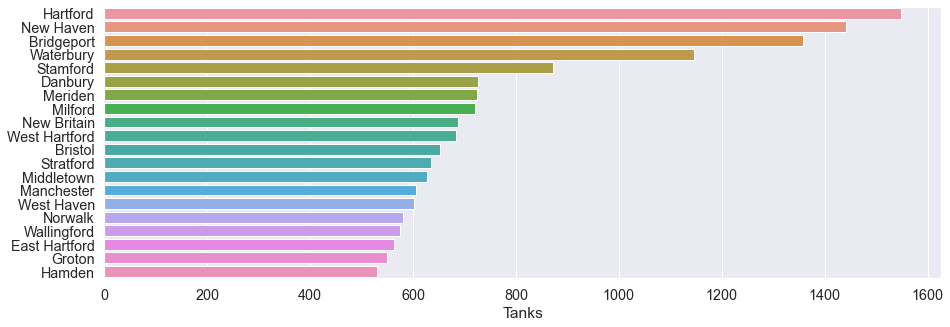

In [52]:
sns.barplot(data =cities , x = 'Tanks',y =  cities.index)

## What are the 10 largest Areas has tanks ?

In [53]:
Areas =df['Area Name'].value_counts().head(10).to_frame('Tanks')

<AxesSubplot:xlabel='Tanks'>

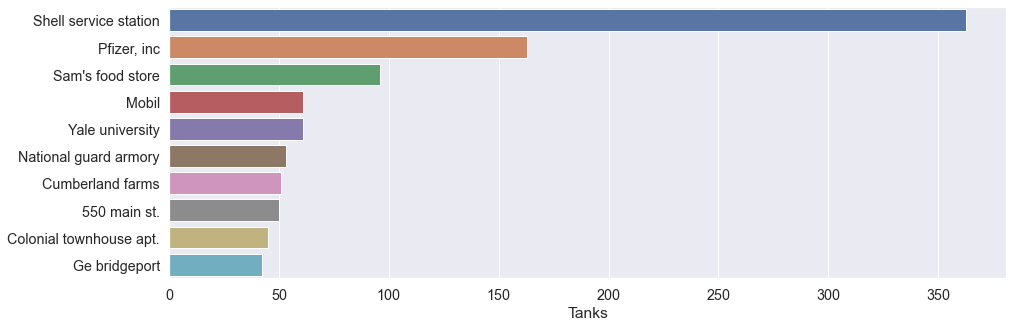

In [54]:
sns.barplot(data =Areas , x = 'Tanks',y =  Areas.index)

## show Closure Type

<AxesSubplot:xlabel='count', ylabel='Closure Type'>

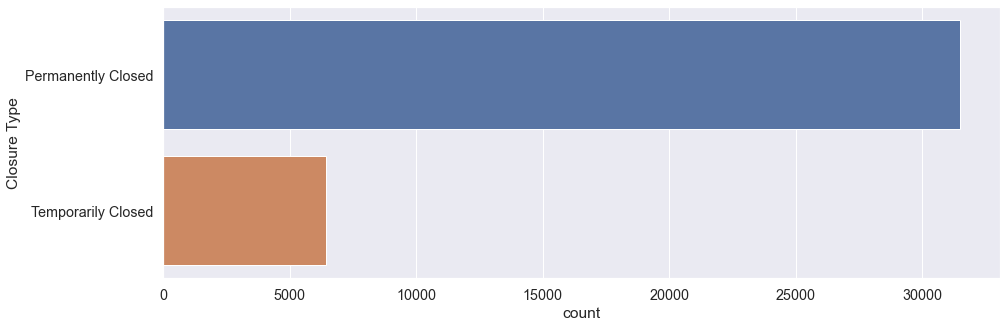

In [55]:
sns.countplot(data = df, y = 'Closure Type')

## which type in the Compartments

<AxesSubplot:xlabel='Compartment', ylabel='count'>

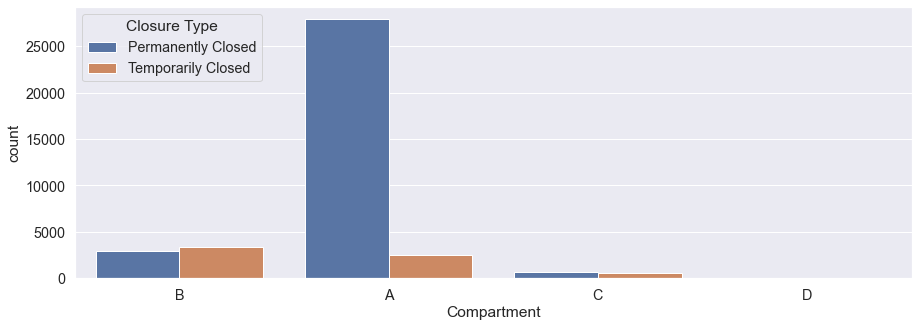

In [56]:
sns.countplot(data = df, x = 'Compartment',hue='Closure Type')

## where is the propene?

In [57]:
df[df['Substance Currently Stored']=='propene']['Area City'].value_counts().index

Index(['Stratford', 'West Hartford', 'Storrs Mansfield', 'Hartford',
       'Willington', 'Vernon Rockville', 'Groton', 'Wallingford', 'Sharon',
       'Branford', 'Plainville', 'Bristol', 'Waterbury', 'New Britain',
       'Niantic', 'Windsor', 'Westport', 'Moosup', 'Windsor Locks',
       'North Windham', 'Cos Cob', 'Milford', 'Pawcatuck', 'Litchfield',
       'South Windsor', 'Milldale', 'Colchester', 'Simsbury', 'Brookfield',
       'Norwich', 'Fairfield', 'Southington', 'West Haven', 'East Windsor',
       'New Haven', 'Middletown', 'Stamford', 'North Haven', 'Rocky Hill',
       'Old Saybrook'],
      dtype='object')

In [58]:
size_propene= df[df['Substance Currently Stored']=='propene']['carrying tank capacity(gallons)'].sum()
size_propene

1031947

## where is the Biodiesel and what its size?

In [59]:
df[df['Substance Currently Stored']=='Biodiesel']['Area City'].value_counts().index

Index(['Stamford', 'Middletown', 'Cheshire', 'Waterbury', 'Willington',
       'Westport'],
      dtype='object')

In [60]:
size_Biodiesel = df[df['Substance Currently Stored']=='Biodiesel']['carrying tank capacity(gallons)'].sum()
size_Biodiesel

76500

## What is the size of the tank which is runing  ?

stock Tank is runing underground

In [61]:
print(df[df['Status of Tank']=='Tank is runing underground']['carrying tank capacity(gallons)'].sum() ,'gallons')

136432265 gallons


## What is the size of the tanks which is runing ?

In [62]:
print(df[df['Closure Type']=='Permanently Closed']['carrying tank capacity(gallons)'].sum() ,'gallons')

160797359 gallons


## What year was the largest volume of gallons launched?

In [63]:
index_of_years = df['Installation year'].value_counts().index

In [64]:
year= {}

In [65]:
for i in index_of_years :
    y = df[df['Installation year']== i]['carrying tank capacity(gallons)'].sum() 
    year.update({y:i})

In [66]:
year[max(year.keys())]

1950

## What year was the tanks with 'Temporarily Closed' starts ?

In [67]:
df[df['Closure Type'] =='Temporarily Closed']['Installation year'].value_counts().index[0]

1989

## Average  Protection degree for each Construction Type

<AxesSubplot:xlabel='Total Protection degree', ylabel='Construction Type - Tank'>

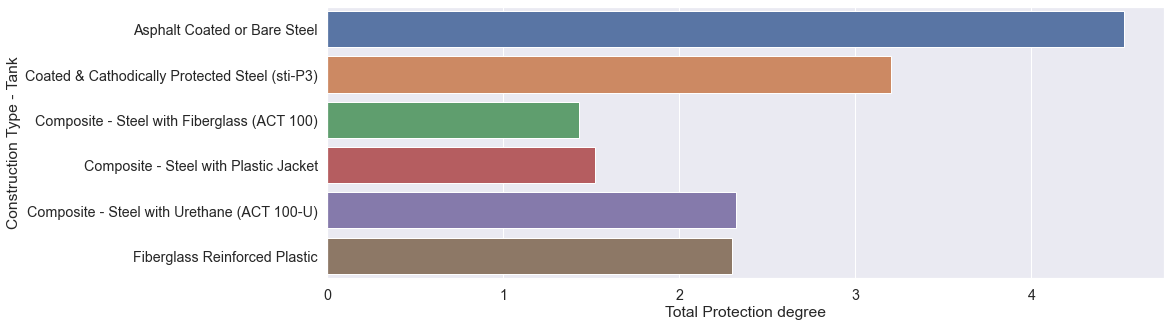

In [68]:
sns.barplot(data = df.groupby('Construction Type - Tank').mean(),
            y = df.groupby('Construction Type - Tank').mean().index ,
            x= 'Total Protection degree')

## Average Protection degree for each Construction Type Piping

<AxesSubplot:xlabel='Total Protection degree', ylabel='Construction Type - Piping'>

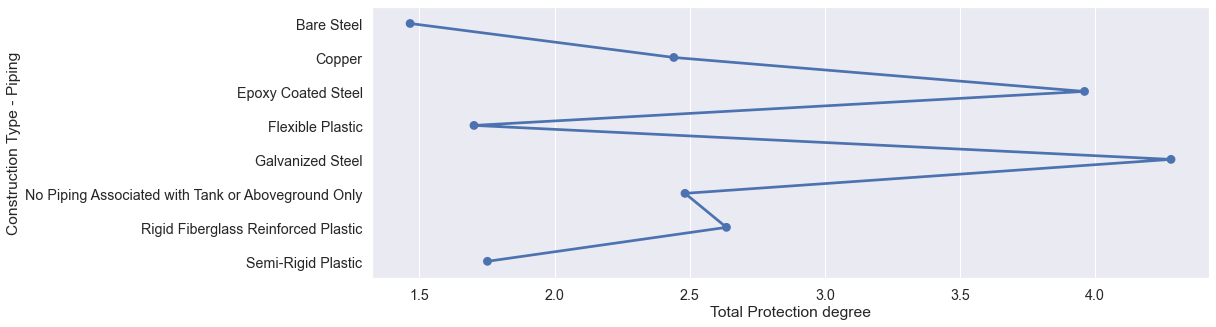

In [69]:
sns.pointplot(data = df.groupby('Construction Type - Piping').mean(),
            y = df.groupby('Construction Type - Piping').mean().index ,
            x= 'Total Protection degree')

## Average gallons for each Substance Currently Stored

<AxesSubplot:xlabel='carrying tank capacity(gallons)', ylabel='Substance Currently Stored'>

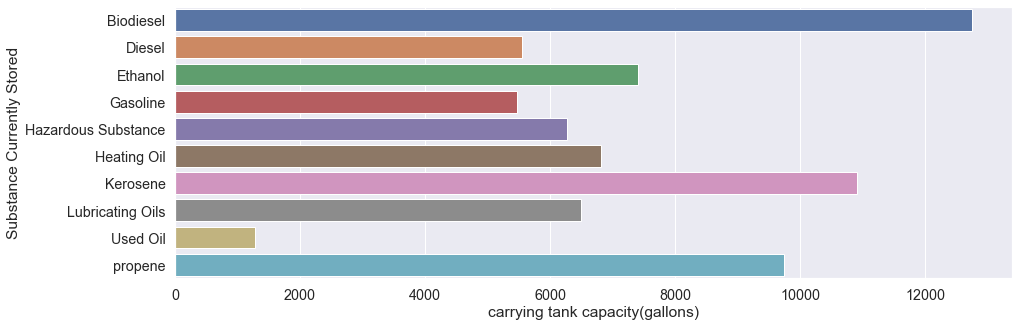

In [70]:
sns.barplot(data = df.groupby('Substance Currently Stored').mean(),
            y = df.groupby('Substance Currently Stored').mean().index ,
            x= 'carrying tank capacity(gallons)')

size of gallons for each Substance Currently Stored

In [71]:
size =df.groupby('Substance Currently Stored').sum()['carrying tank capacity(gallons)'].sort_values(ascending=False).to_frame('size gallons') 
size

,size gallons
Substance Currently Stored,
Gasoline,118947516
Heating Oil,59905425
Diesel,24704951
Hazardous Substance,3625740
Used Oil,2560317
Kerosene,2367937
propene,1031947
Ethanol,126000
Biodiesel,76500


<AxesSubplot:xlabel='size gallons', ylabel='Substance Currently Stored'>

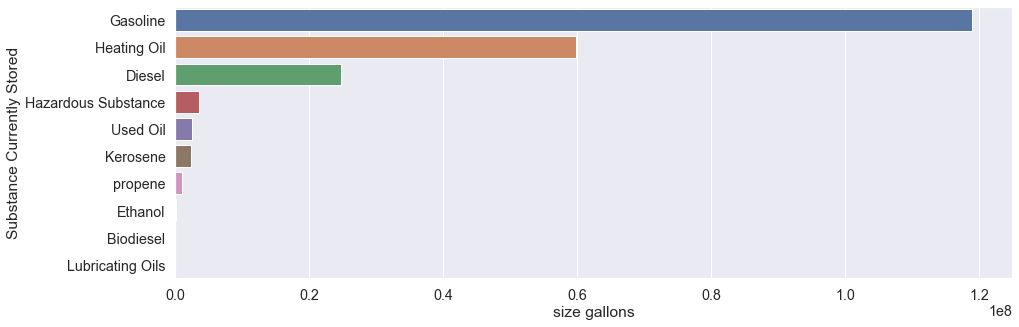

In [72]:
sns.barplot(data = size , x = 'size gallons',y = size.index)

## 
Despite the increase in the volume of gasoline, the average biodiesel and propane tanks are good


## Average age 
for tanks that is runing and the abandoned 

In [73]:
df.groupby('Status of Tank').mean()['Tank_age (years)']

Status of Tank
Tank is runing underground      51.740455
Tank was Abandoned in Ground    34.411914
Name: Tank_age (years), dtype: float64

## There were tanks was Abandoned in Ground what about Protection


Is Construction Tank plays role ?

In [74]:
Protection = df.pivot_table(values= 'Total Protection degree',index='Construction Type - Tank',columns='Status of Tank', aggfunc='mean')

<AxesSubplot:xlabel='Status of Tank', ylabel='Construction Type - Tank'>

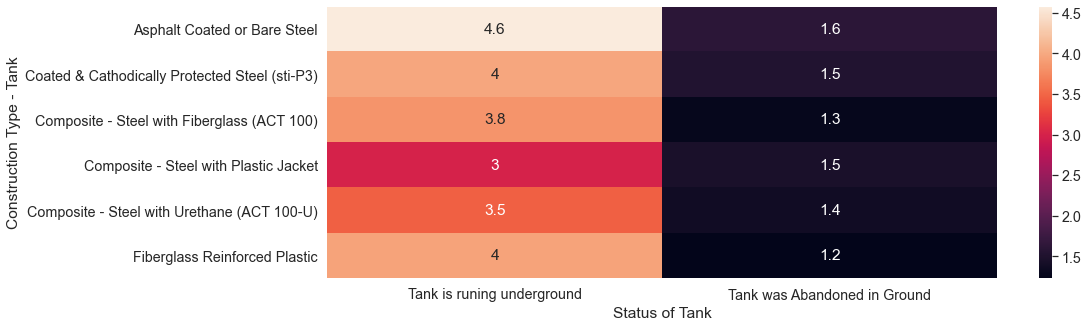

In [75]:
sns.heatmap(data = Protection,annot = True ) 

yes , Construction Piping has role

Is Construction Piping plays role ?

In [76]:
Protection1 = df.pivot_table(values= 'Total Protection degree',index='Construction Type - Piping',columns='Status of Tank', aggfunc='mean')

<AxesSubplot:xlabel='Status of Tank', ylabel='Construction Type - Piping'>

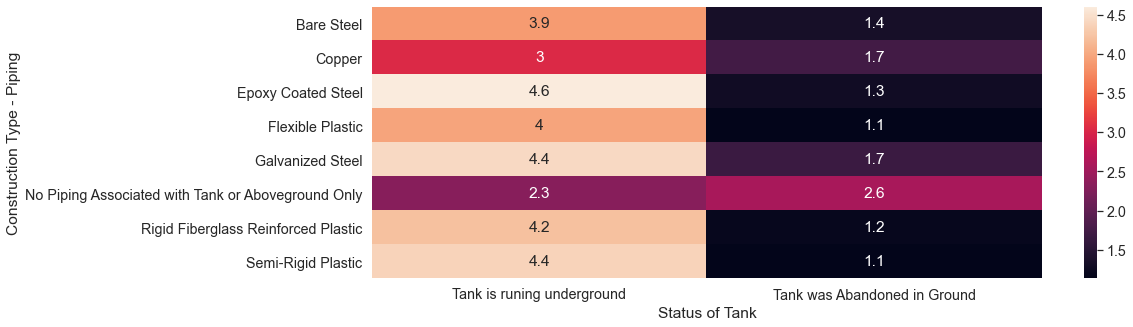

In [77]:
sns.heatmap(data = Protection1,annot = True ) 

yes , Construction Piping  has role

Is Closure Type plays role ?

<AxesSubplot:xlabel='Total Protection degree', ylabel='Closure Type'>

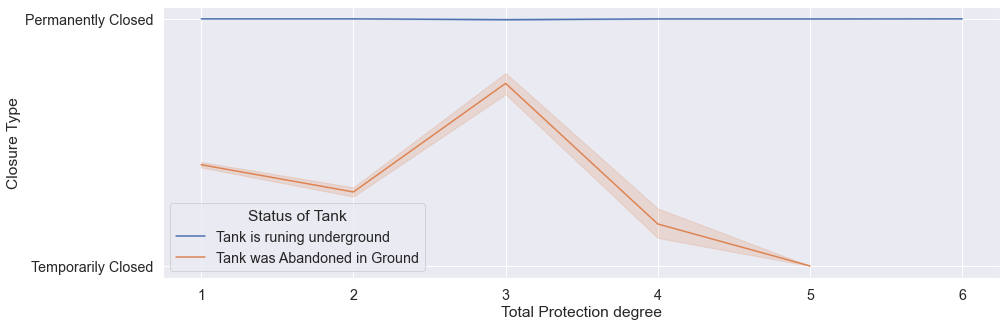

In [78]:
sns.lineplot(data = df , x = 'Total Protection degree',hue = 'Status of Tank',y = 'Closure Type')

yes , Closure Type has role

Is the age of tank plays role ? 

In [79]:
df.groupby('Status of Tank').mean()['Tank_age (years)']

Status of Tank
Tank is runing underground      51.740455
Tank was Abandoned in Ground    34.411914
Name: Tank_age (years), dtype: float64

No , age has no role 

## Is the Area Address plays role in  abandoning in Ground ?

count the ratio of tanks that were abandoned in Ground from all the tanks 
implement on top 50 area Address

In [80]:
address = df[df['Status of Tank']=='Tank was Abandoned in Ground']['Area Address'].value_counts().head(50)

In [81]:
rate = []
area = []

In [82]:
address = df[df['Status of Tank']=='Tank was Abandoned in Ground']['Area Address'].value_counts().head(50)

In [83]:
address

1 charter oak blvd                 27
Centennial ave.                    24
856 echo lake rd                   21
281 silver sands rd                19
1875 meriden-waterbury turnpike    16
314 rope ferry rd                  16
327 ruby rd                        15
939 barnum ave                     15
2191 straits tnpk                  14
3 e industrial rd                  14
550 main st                        13
290 pratt st                       13
Cheney drive                       13
2909 main st                       13
Stoddard drive                     12
695 high st                        12
Centennial ave                     12
528 s cherry st                    12
225 episcopal rd                   11
1975 barnum ave                    11
440 main st                        11
37 e aurora st                     11
450 barnum ave                     11
280 elm st                         11
West connector rd                  11
12 new haven ave                   11
551 main ave

In [84]:
for x in address.index :
    num  = df[df['Area Address']== x]['Status of Tank'].value_counts()['Tank was Abandoned in Ground']
    percent = df[df['Area Address']== x]['Status of Tank'].value_counts()[0] + [1][0]
    rate.append(math.floor(num/percent*100))
    area.append(x)


In [85]:
ratio = pd.DataFrame(rate,index=area,columns =['percent']).sort_values(by = 'percent')


<AxesSubplot:xlabel='Density', ylabel='percent'>

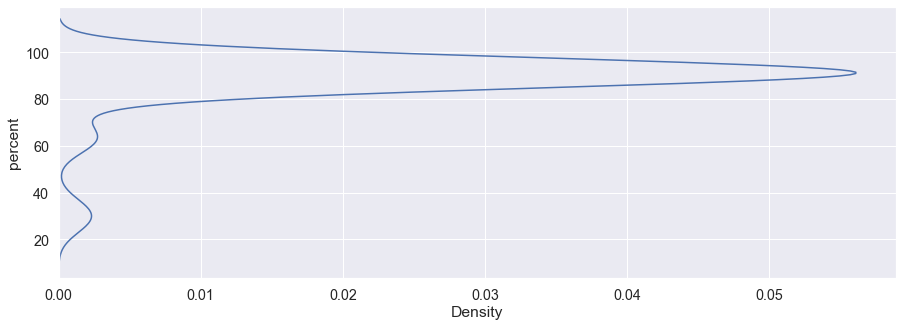

In [86]:
sns.kdeplot(data = ratio , y ='percent')

# Machin learing

## 
make prediction about the Status of Tanks
 - to predict if the tank was Abandoned in Ground or still running
 - to predict the future tank that will be Abandoned 

In [87]:
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate 

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering ,k_means
from sklearn.preprocessing import MinMaxScaler , StandardScaler , normalize , RobustScaler , OneHotEncoder 
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import cross_validate 
from sklearn.neighbors import KNeighborsClassifier
from category_encoders import BinaryEncoder


## Using pipeline module

In [89]:
# to encoding OneHotEncoder

columns = ['Closure Type','Compartment',
           'Substance Currently Stored',
           'Construction Type - Tank','Construction Type - Piping',
           'Overfill Protection','Spill Protection','Tank protection']

In [90]:
# to encoding BinaryEncoder

columns1 = ['Area Address','Area City','Site Zip','Tank Num']

In [91]:
# to Scaling

columns2 = ['Site Zip','carrying tank capacity(gallons)',
            'Tank Latitude','Tank Longitude','Area Latitude',
            'Area Longitude','Tank_age (years)']

In [92]:
encodeing = OneHotEncoder(drop = 'first',sparse=False)
encodeing1 = BinaryEncoder()
Scaler = StandardScaler()

In [93]:
encoder =ColumnTransformer(transformers = [
   (('encoder',encodeing, columns)),(('encoder1',encodeing1,columns1)),(('Scaler',Scaler,columns2))],
                           remainder = 'passthrough')

In [94]:
encoder 

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Closure Type', 'Compartment',
                                  'Substance Currently Stored',
                                  'Construction Type - Tank',
                                  'Construction Type - Piping',
                                  'Overfill Protection', 'Spill Protection',
                                  'Tank protection']),
                                ('encoder1', BinaryEncoder(),
                                 ['Area Address', 'Area City', 'Site Zip',
                                  'Tank Num']),
                                ('Scaler', StandardScaler(),
                                 ['Site Zip', 'carrying tank capacity(gallons)',
                                  'Tank Latitude', 'Tank Longitude',
                                  'Area Latitude', 'Area Longitude',
                                  'Tank_age (years)'])])

## 
drop Installation Date , Installation year , Area Name

In [95]:
df.drop(['Installation Date' ,'Installation year','Area Name'],axis = 1 , inplace = True)

encode the target (Status of Tank)

In [96]:
def Status(x):
    if x == 'Tank is runing underground' :
        return 0
    elif  x == 'Tank was Abandoned in Ground' :
        return 1
    else :
        return x

In [97]:
df['Status of Tank'] = df['Status of Tank'].apply(Status)

In [98]:
x = df.drop('Status of Tank',axis = 1)
y = df['Status of Tank']

## choose the best model
best accuracy

In [99]:
models = list()
models.append(("DecisionTreeClassifier" , DecisionTreeClassifier(max_depth=6 , max_leaf_nodes=10 , max_features=5)))
models.append(("GaussianNB" , GaussianNB()))
models.append(("LogisticRegression" , LogisticRegression()))
models.append(("KNeighborsClassifier" , KNeighborsClassifier()))
models.append(("XGBClassifier" , XGBClassifier(n_estimators=10)))
models.append(("RandomForestClassifier" , RandomForestClassifier(n_estimators=20)))

In [100]:
for model in models:
    step = list()
    step.append(("encoder" , encoder))
    step.append(model)
    pipline = Pipeline(steps = step)
    codec = cross_validate(pipline,x , y, cv = 5 ,return_train_score=True,scoring='accuracy')
    print(model[0])
    print("Train accuracy is ",codec["train_score"].mean())
    print("Test accuracy is " , codec["test_score"].mean())
    print("*" * 50)
    


DecisionTreeClassifier
Train accuracy is  0.9264046319232321
Test accuracy is  0.9152316943695157
**************************************************
GaussianNB
Train accuracy is  0.9832507172645559
Test accuracy is  0.9677794695533406
**************************************************
LogisticRegression
Train accuracy is  0.9881416807796979
Test accuracy is  0.9868695916792218
**************************************************
KNeighborsClassifier
Train accuracy is  0.987805523519252
Test accuracy is  0.9799614805818789
**************************************************
XGBClassifier
Train accuracy is  1.0
Test accuracy is  1.0
**************************************************
RandomForestClassifier
Train accuracy is  1.0
Test accuracy is  0.9997626895187871
**************************************************


In [101]:
steps = list()
steps.append(("encoder" , encoder))
steps.append(("Model" , LogisticRegression()))

In [102]:
pipeline = Pipeline(steps = steps)

In [103]:
code = cross_validate(pipeline,x,y,cv = 5 ,return_train_score=True,scoring='accuracy')

In [104]:
code['train_score'].mean() , code['test_score'].mean()

(0.9881416807796979, 0.9868695916792218)

In [105]:
code1 = cross_validate(pipeline,x,y,cv = 5 ,return_train_score=True,scoring='recall')

In [106]:
code1['train_score'].mean() , code1['test_score'].mean()

(0.9699108818011256, 0.9669793621013133)

In [107]:
code0 = cross_validate(pipeline,x,y,cv = 5 ,return_train_score=True,scoring='precision')

In [108]:
code0['train_score'].mean() , code0['test_score'].mean()

(0.9876732804348481, 0.9860508433453532)

In [109]:
pipeline.fit(x,y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Closure Type',
                                                   'Compartment',
                                                   'Substance Currently Stored',
                                                   'Construction Type - Tank',
                                                   'Construction Type - Piping',
                                                   'Overfill Protection',
                                                   'Spill Protection',
                                                   'Tank protection']),
                                                 ('encoder1', BinaryEncoder(),
                                                  ['Area Address', 'Area City',
                                                   'Site Zip', 'Tank Num']),
                                                 ('Scaler', StandardScaler(),
                                                  ['Site Zip',
                                                   'carrying tank '
                                                   'capacity(gallons)',
                                                   'Tank Latitude',
                                                   'Tank Longitude',
                                                   'Area Latitude',
                                                   'Area Longitude',
                                                   'Tank_age (years)'])])),
                ('Model', LogisticRegression())])

## prediction

In [110]:
pred= x.sample(20)

In [111]:
pipeline.predict(pred)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

Save

In [112]:
import joblib 

In [113]:
joblib.dump(pipeline , "pipeline.h5")

['pipeline.h5']

## Feature selection

In [114]:
from sklearn.feature_selection import SelectKBest , f_regression

In [115]:
select_best = SelectKBest(score_func =f_regression , k = 5)

In [116]:
from sklearn.preprocessing import StandardScaler ,OneHotEncoder

In [117]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse= False , drop= 'first')
encoder1 = BinaryEncoder()

In [118]:
cat_column= encoder.fit_transform(df[columns])

In [119]:
cat_column1 = encoder1.fit_transform(df[columns1])

In [120]:
tranform = pd.DataFrame(cat_column , columns=encoder.get_feature_names_out())

In [121]:
tranform1 = pd.DataFrame(cat_column1 , columns=encoder1.get_feature_names())

In [122]:
df_copy = df.copy()

to get featurename in deep learing drop the featurecode

In [123]:
col = ['Spill Protection degree','Total Protection degree','Tank Protection degree','Overfill Protection degree']

In [124]:
df_copy.drop(columns+columns1+col,axis = 1,inplace = True)

In [125]:
data  = pd.concat([df_copy,tranform,tranform1],axis = 1  )

In [126]:
x = data.drop('Status of Tank',axis = 1)
y = data['Status of Tank']

In [127]:
from sklearn.feature_selection import SelectKBest , f_regression

In [128]:
select_best = SelectKBest(score_func =f_regression , k = 5)

In [129]:
select_best.fit(x,y)

SelectKBest(k=5, score_func=<function f_regression at 0x000001FF63FE8C10>)

In [130]:
feature_selection = pd.DataFrame(select_best.fit_transform(x,y), columns= select_best.get_feature_names_out())
feature_selection

,Closure Type_Temporarily Closed,Construction Type - Piping_Galvanized Steel,Overfill Protection_Ball Float Device,"Tank protection_Cathodically Protected,Double Walled,Interior Lined with Epoxy Coating",Tank protection_Single Walled
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
37922,0.0,1.0,0.0,1.0,0.0
37923,1.0,0.0,0.0,0.0,0.0
37924,1.0,0.0,0.0,0.0,0.0
37925,1.0,0.0,0.0,0.0,0.0


tank with Single Walled & Temporarily Closed & Ball Float Device is the  most likely to be abandoned
#     
 #   
  #   
     
     
<img src="tank3.jpg">

## --------------------------------------------------------------------------

________________________________________________________________________________

## deep learning

In [161]:
from sklearn.cluster import  KMeans

In [162]:
list1 = list()
list1.append(("Model" , KMeans(n_clusters=5)))

In [163]:
pipeline2 = Pipeline(steps = list1)

In [164]:
pipeline2.fit(feature_selection)

Pipeline(steps=[('Model', KMeans(n_clusters=5))])

In [165]:
pipeline2.predict(feature_selection)

array([3, 4, 0, ..., 4, 4, 2])

In [166]:
feature_selection['cluster'] = pipeline2.predict(feature_selection)

In [167]:
feature_selection['cluster'].value_counts()

0    10559
1     9790
4     7529
2     5578
3     4471
Name: cluster, dtype: int64

the tanks (1079) which cluster = 4  are most likely to be abandoned